# Mining Information

In [33]:
# imports.py
from imports import *

# plotting magic
%matplotlib inline


# !!! Warning !!! 
# *** no more warnings ***
import warnings
warnings.filterwarnings("ignore")

# custom mods
import tidy

In [34]:
df = tidy.csv_btcusd()

cached csv


In [35]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [36]:
df = tidy.pre_cleaning(df)

In [37]:
df = tidy.add_targets(df)

In [38]:
df.head()

,open,high,low,close,volume,fwd_log_ret,fwd_ret,fwd_pct_chg,fwd_close_positive
date,,,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,-0.074643,-32.894013,-0.071926,False
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,-0.072402,-29.644012,-0.069843,False
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.035111,14.108002,0.035735,True
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,-0.024968,-10.082978,-0.024659,False
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.008317,3.330994,0.008352,True


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2807 entries, 2014-09-17 00:00:00+00:00 to 2022-05-24 00:00:00+00:00
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open                2807 non-null   float64
 1   high                2807 non-null   float64
 2   low                 2807 non-null   float64
 3   close               2807 non-null   float64
 4   volume              2807 non-null   int64  
 5   fwd_log_ret         2807 non-null   float64
 6   fwd_ret             2807 non-null   float64
 7   fwd_pct_chg         2807 non-null   float64
 8   fwd_close_positive  2807 non-null   bool   
dtypes: bool(1), float64(7), int64(1)
memory usage: 200.1 KB


In [40]:
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

<AxesSubplot:xlabel='date'>

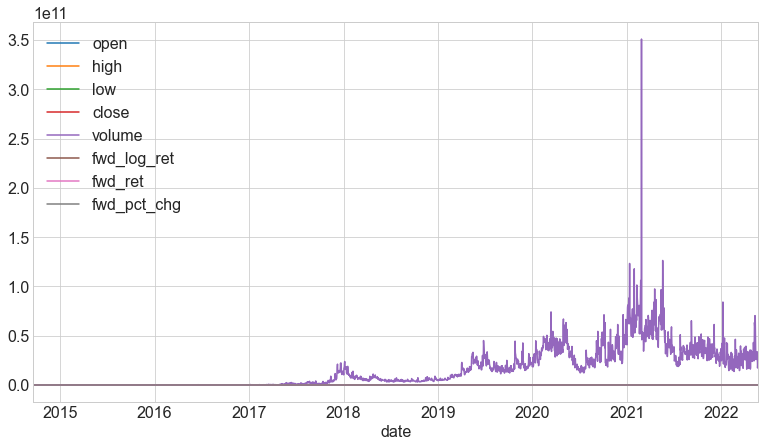

In [41]:
df.plot()

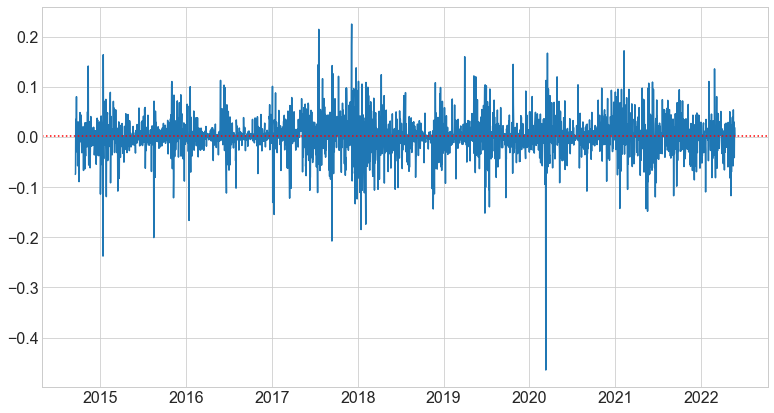

In [42]:
plt.plot(df.fwd_log_ret)
plt.axhline(df.fwd_log_ret.mean(), color='red', ls='dotted')

In [43]:
df.resample('3D').mean()

,open,high,low,close,volume,fwd_log_ret,fwd_ret,fwd_pct_chg,fwd_close_positive
date,,,,,,,,,
2014-09-17 00:00:00+00:00,448.942332,450.956329,416.686005,425.523336,3.115323e+07,-0.037311,-16.143341,-0.035344,0.333333
2014-09-20 00:00:00+00:00,400.619334,414.212657,393.398000,403.292338,2.919043e+07,0.021227,8.962331,0.022447,0.666667
2014-09-23 00:00:00+00:00,420.333008,433.729665,408.932322,423.523326,3.418053e+07,-0.024899,-10.455332,-0.024578,0.000000
2014-09-26 00:00:00+00:00,404.818665,407.525991,390.571004,393.708659,2.003447e+07,-0.024765,-9.652659,-0.024196,0.000000
2014-09-29 00:00:00+00:00,380.147675,389.188996,375.487661,382.008667,3.114480e+07,-0.000351,-0.131673,-0.000102,0.333333
...,...,...,...,...,...,...,...,...,...
2022-05-11 00:00:00+00:00,29661.276042,30990.214844,27767.744792,29089.070313,6.007305e+10,0.013156,388.303385,0.013297,1.000000
2022-05-14 00:00:00+00:00,30229.534505,30935.445312,29160.845052,30423.098958,2.900971e+10,0.003575,108.197266,0.004258,0.666667
2022-05-17 00:00:00+00:00,29669.082031,30581.319661,28999.843099,29820.154297,3.138673e+10,-0.013700,-408.372396,-0.012430,0.333333


In [44]:
column_n = df.columns

OPEN


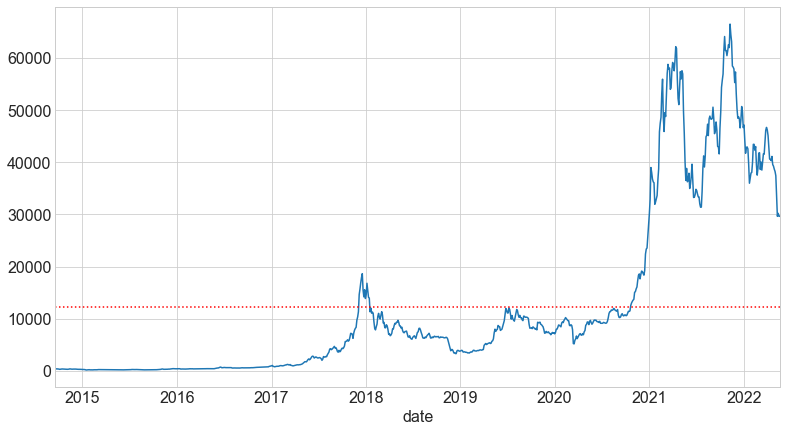

HIGH


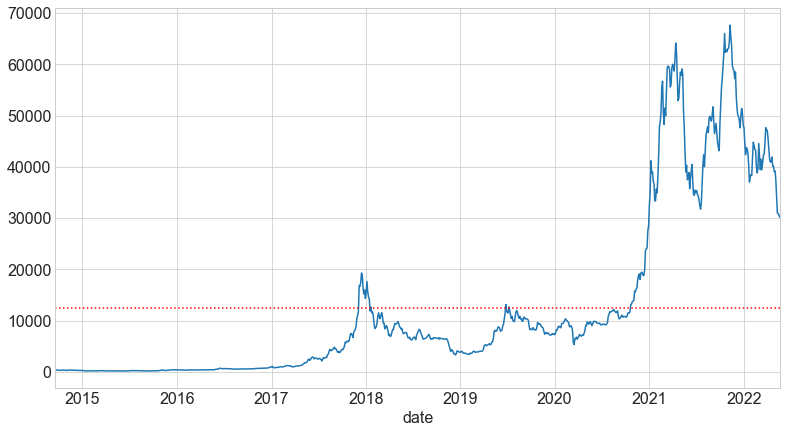

LOW


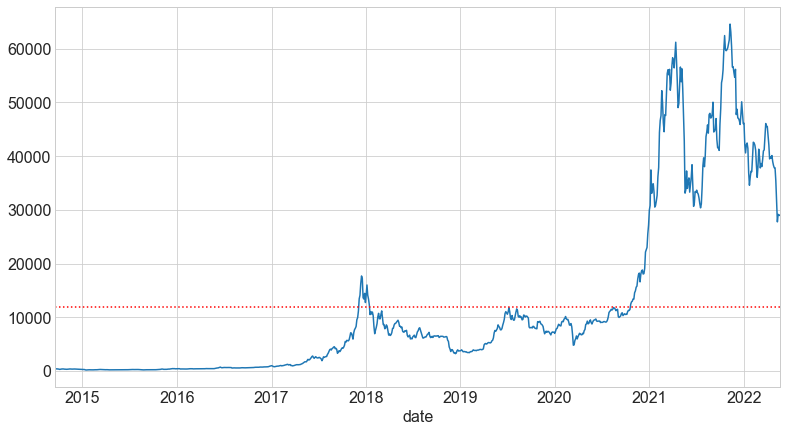

CLOSE


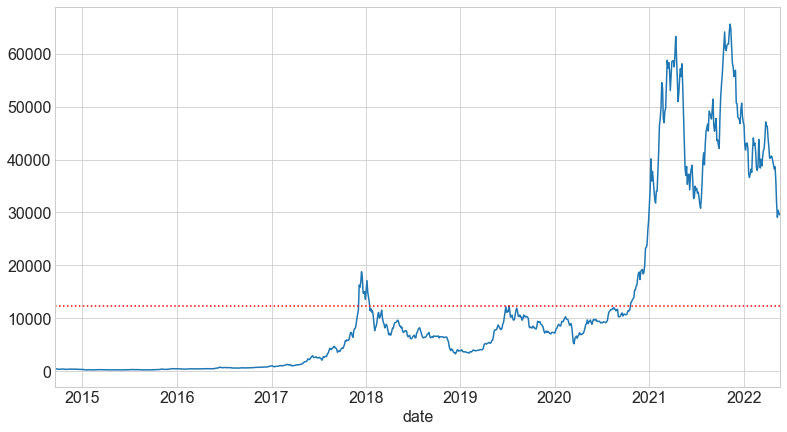

VOLUME


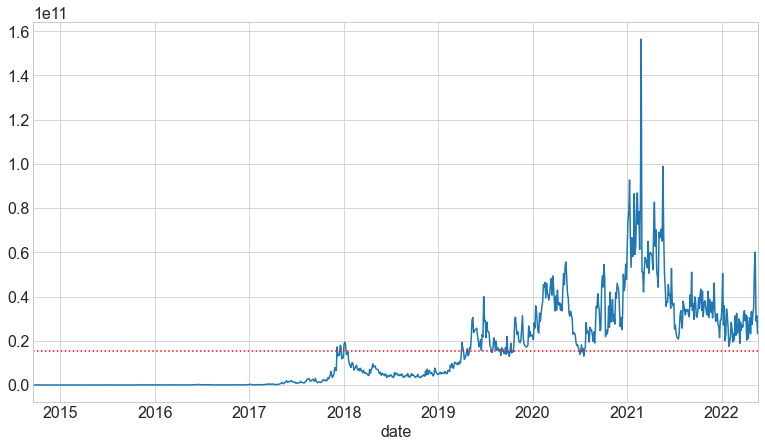

FWD_LOG_RET


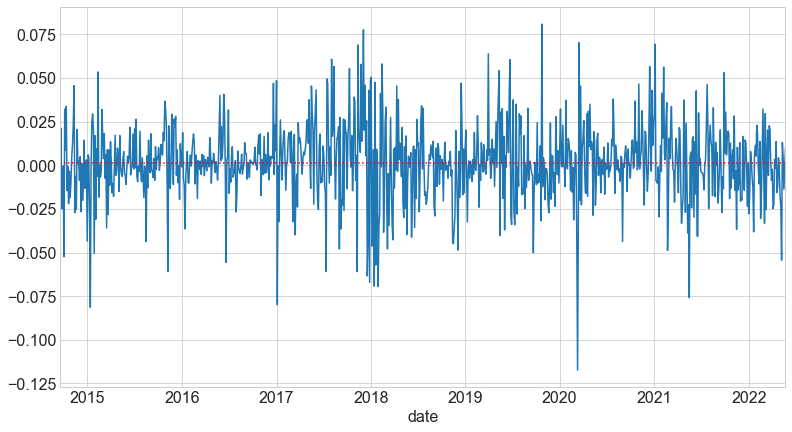

FWD_RET


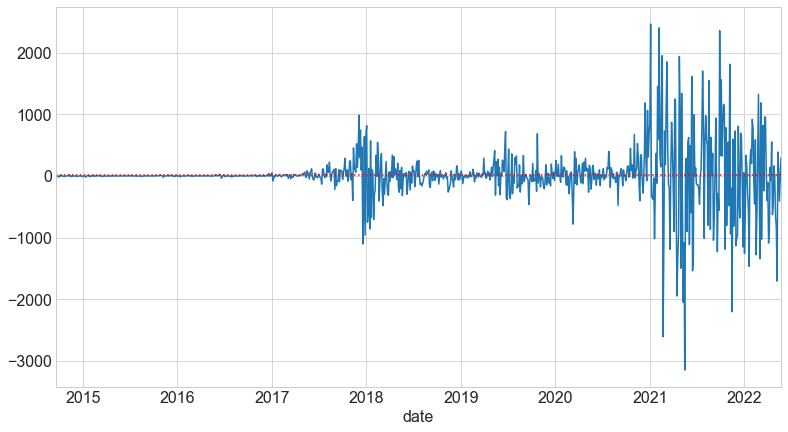

FWD_PCT_CHG


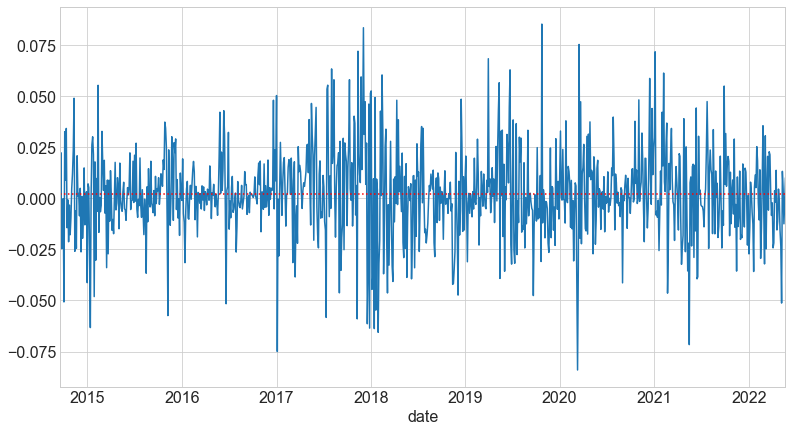

FWD_CLOSE_POSITIVE


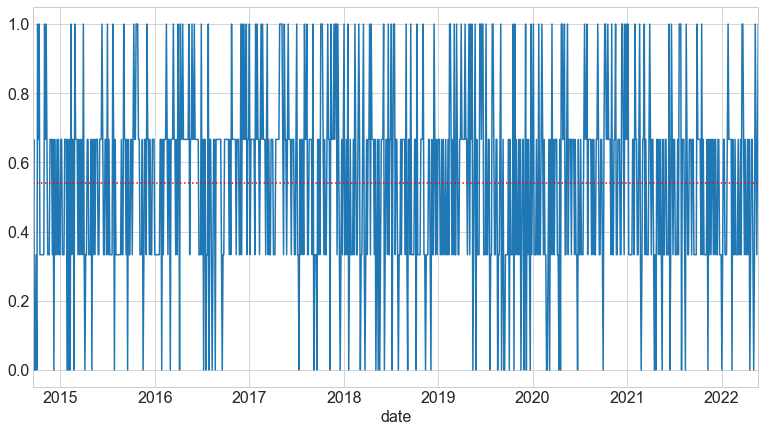

In [45]:
for col in column_n:
    print(col.upper())
    df[col].resample('3D').mean().plot()
    plt.axhline(df[col].mean(), color='red', ls='dotted')
    plt.show()
    

<AxesSubplot:xlabel='date'>

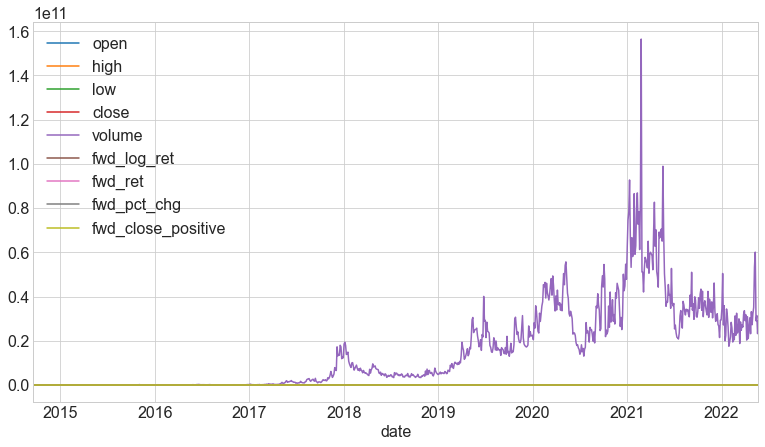

In [46]:
df.resample('3D').mean().plot()

<AxesSubplot:xlabel='date'>

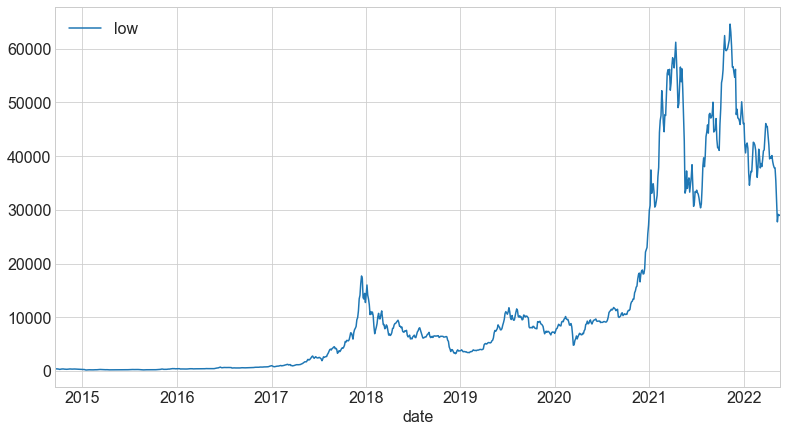

In [47]:
df[['low']].resample('3D').mean().plot()

<AxesSubplot:xlabel='date'>

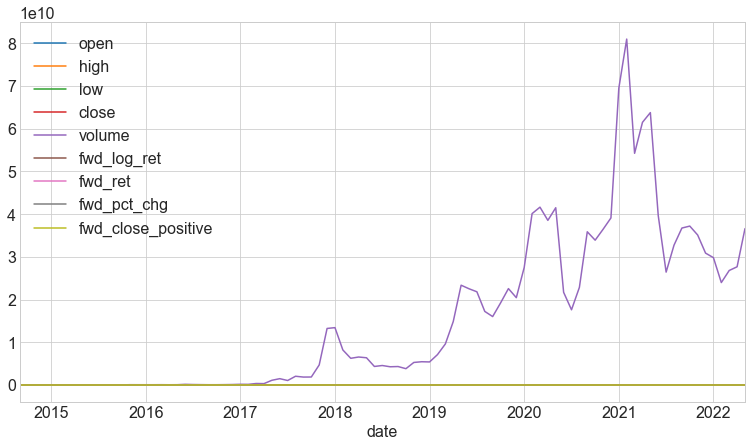

In [48]:
df.resample('M').mean().plot()

In [49]:
np.exp(df.fwd_log_ret).mean()

1.0022456855740653

In [50]:
df.fwd_ret.sum()

29232.960907

In [51]:
df.fwd_close_positive.sum()

1517

<AxesSubplot:xlabel='date'>

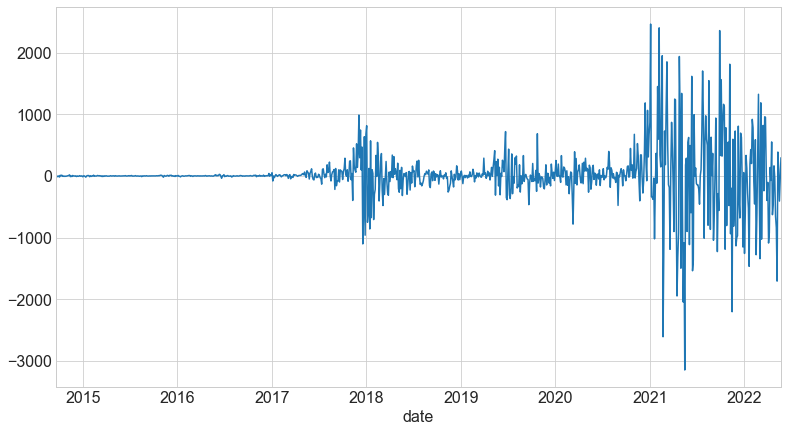

In [52]:
df['fwd_ret'].resample('3D').mean().plot()

financial_forecaster/project_csvs/transaction-fees-to-miners.csv

### **cost_pertrans :** the miners revenue divided by the number of transactions.

In [53]:
cost_pertrans = pd.read_csv('~/codeup-data-science/financial_forecaster/project_csvs/cost-per-transaction.csv')
cost_pertrans.Timestamp = pd.to_datetime(cost_pertrans.Timestamp).dt.date
cost_pertrans = cost_pertrans.set_index('Timestamp').sort_index()
cost_pertrans.head()

,cost-per-transaction
Timestamp,
2009-01-16,0.0
2009-01-19,0.0
2009-01-22,0.0
2009-01-25,0.0
2009-01-28,0.0


### **cost_pertrans_percent :** miners revenue as percentage of the transaction volume.

In [54]:
cost_pertrans_percent = pd.read_csv('~/codeup-data-science/financial_forecaster/project_csvs/cost-per-transaction-percent.csv')
cost_pertrans_percent.Timestamp = pd.to_datetime(cost_pertrans_percent.Timestamp).dt.date
cost_pertrans_percent = cost_pertrans_percent.set_index('Timestamp').sort_index()
cost_pertrans_percent.head()


,cost-per-transaction-percent
Timestamp,
2010-08-28,69.031160
2010-08-31,26.529699
2010-09-03,33.303030
2010-09-06,28.676139
2010-09-09,40.140295


### **fees_pertransaction :** Average transaction fees in USD per transaction.

In [55]:
fees_pertransaction = pd.read_csv('~/codeup-data-science/financial_forecaster/project_csvs/avg-fees-per-transaction.csv')
fees_pertransaction.Timestamp = pd.to_datetime(fees_pertransaction.Timestamp).dt.date
fees_pertransaction = fees_pertransaction.set_index('Timestamp').sort_index()
fees_pertransaction.head()

,fees-usd-per-transaction
Timestamp,
2009-01-16,0.0
2009-01-19,0.0
2009-01-22,0.0
2009-01-25,0.0
2009-01-28,0.0


### **fees_tominers :** The total USD value of all transaction fees paid to miners. 
*Note: Does not include coinbase block rewards.*

In [56]:
fees_tominers = pd.read_csv('~/codeup-data-science/financial_forecaster/project_csvs/transaction-fees-to-miners.csv')
fees_tominers.Timestamp = pd.to_datetime(fees_tominers.Timestamp).dt.date
fees_tominers = fees_tominers.set_index('Timestamp').sort_index()
fees_tominers.head()

,transaction-fees-usd
Timestamp,
2009-01-16,0.0
2009-01-19,0.0
2009-01-22,0.0
2009-01-25,0.0
2009-01-28,0.0


### **miners_revenue :** Total value in USD of coinbase block rewards and transaction fees paid to miners.


In [57]:
miners_revenue = pd.read_csv('~/codeup-data-science/financial_forecaster/project_csvs/miners-revenue.csv')
miners_revenue.Timestamp = pd.to_datetime(miners_revenue.Timestamp).dt.date
miners_revenue = miners_revenue.set_index('Timestamp').sort_index()
miners_revenue.head()

,miners-revenue
Timestamp,
2009-01-16,0.0
2009-01-19,0.0
2009-01-22,0.0
2009-01-25,0.0
2009-01-28,0.0


### **difficulty:** A relative measure of how difficult it is to mine a new block for the blockchain

In [58]:
difficulty = pd.read_csv('~/codeup-data-science/financial_forecaster/project_csvs/difficulty.csv')
difficulty.Timestamp = pd.to_datetime(difficulty.Timestamp).dt.date
difficulty = difficulty.set_index('Timestamp').sort_index()
difficulty.head()

,difficulty
Timestamp,
2009-01-02,1.0
2009-01-05,0.0
2009-01-08,1.0
2009-01-11,1.0
2009-01-14,1.0


### **total_hash_rate:** The estimated number of terahashes per second the bitcoin network is performing in the last 24 hours.

In [59]:
total_hash_rate = pd.read_csv('~/codeup-data-science/financial_forecaster/project_csvs/hash-rate.csv')
total_hash_rate.Timestamp = pd.to_datetime(total_hash_rate.Timestamp).dt.date
total_hash_rate = total_hash_rate.set_index('Timestamp').sort_index()
total_hash_rate.head()

,hash-rate
Timestamp,
2009-01-02,4.971027e-08
2009-01-05,0.000000e+00
2009-01-08,6.959438e-07
2009-01-11,4.424214e-06
2009-01-14,6.313204e-06


In [60]:
df.index = df.index.date
df['cost_pertransaction'] = cost_pertrans
df['cost_pertransaction_percent'] = cost_pertrans_percent
df['fees_pertransaction'] = fees_pertransaction
df['fees_tominers'] = fees_tominers
df['miners_revenue'] = miners_revenue
df['relative_difficulty'] = difficulty
df['total_hash_rate'] = total_hash_rate

In [61]:
df

,open,high,low,close,volume,fwd_log_ret,fwd_ret,fwd_pct_chg,fwd_close_positive,cost_pertransaction,cost_pertransaction_percent,fees_pertransaction,fees_tominers,miners_revenue,relative_difficulty,total_hash_rate
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,-0.074643,-32.894013,-0.071926,False,NaN,4.231596,NaN,NaN,NaN,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,-0.072402,-29.644012,-0.069843,False,29.138967,NaN,0.072554,6033.262208,2.423051e+06,NaN,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.035111,14.108002,0.035735,True,NaN,NaN,NaN,NaN,NaN,2.982973e+10,2.402207e+05
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,-0.024968,-10.082978,-0.024659,False,NaN,3.069054,NaN,NaN,NaN,NaN,NaN
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.008317,3.330994,0.008352,True,29.910568,NaN,0.064216,4207.641303,1.959830e+06,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-20,30311.119141,30664.976563,28793.605469,29200.740234,30749382605,0.007896,231.486329,0.007927,True,NaN,0.494886,NaN,NaN,NaN,NaN,NaN
2022-05-21,29199.859375,29588.869141,29027.394531,29432.226563,17274840442,0.029840,891.496093,0.030290,True,112.755347,NaN,1.567418,354255.305563,2.548406e+07,NaN,NaN
2022-05-22,29432.472656,30425.861328,29275.183594,30323.722656,21631532270,-0.041230,-1224.812500,-0.040391,False,NaN,NaN,NaN,NaN,NaN,3.125110e+13,1.895271e+08
2022-05-23,30309.396484,30590.585938,28975.560547,29098.910156,31483454557,0.018950,556.675782,0.019130,True,NaN,0.620023,NaN,NaN,NaN,NaN,NaN


In [62]:
df.index = pd.to_datetime(df.index)

In [63]:
df.fillna(method='ffill')

,open,high,low,close,volume,fwd_log_ret,fwd_ret,fwd_pct_chg,fwd_close_positive,cost_pertransaction,cost_pertransaction_percent,fees_pertransaction,fees_tominers,miners_revenue,relative_difficulty,total_hash_rate
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,-0.074643,-32.894013,-0.071926,False,NaN,4.231596,NaN,NaN,NaN,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,-0.072402,-29.644012,-0.069843,False,29.138967,4.231596,0.072554,6033.262208,2.423051e+06,NaN,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.035111,14.108002,0.035735,True,29.138967,4.231596,0.072554,6033.262208,2.423051e+06,2.982973e+10,2.402207e+05
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,-0.024968,-10.082978,-0.024659,False,29.138967,3.069054,0.072554,6033.262208,2.423051e+06,2.982973e+10,2.402207e+05
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.008317,3.330994,0.008352,True,29.910568,3.069054,0.064216,4207.641303,1.959830e+06,2.982973e+10,2.402207e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-20,30311.119141,30664.976563,28793.605469,29200.740234,30749382605,0.007896,231.486329,0.007927,True,96.257967,0.494886,1.857998,488480.736741,2.530689e+07,3.125110e+13,1.895271e+08
2022-05-21,29199.859375,29588.869141,29027.394531,29432.226563,17274840442,0.029840,891.496093,0.030290,True,112.755347,0.494886,1.567418,354255.305563,2.548406e+07,3.125110e+13,1.895271e+08
2022-05-22,29432.472656,30425.861328,29275.183594,30323.722656,21631532270,-0.041230,-1224.812500,-0.040391,False,112.755347,0.494886,1.567418,354255.305563,2.548406e+07,3.125110e+13,1.895271e+08
2022-05-23,30309.396484,30590.585938,28975.560547,29098.910156,31483454557,0.018950,556.675782,0.019130,True,112.755347,0.620023,1.567418,354255.305563,2.548406e+07,3.125110e+13,1.895271e+08


<AxesSubplot:>

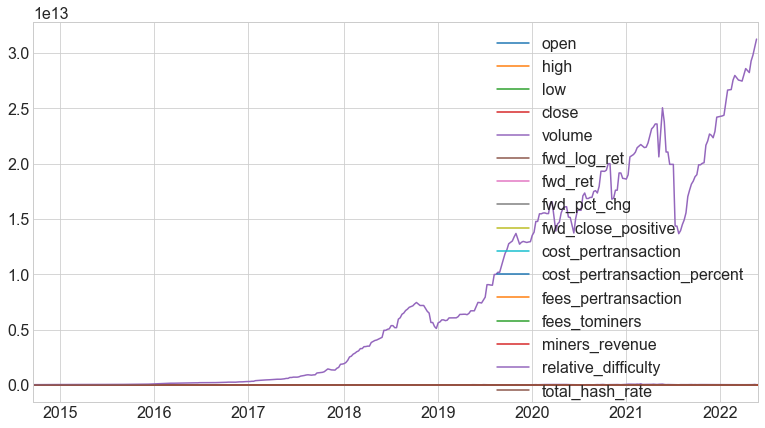

In [64]:
df.resample('W').mean().plot()

OPEN


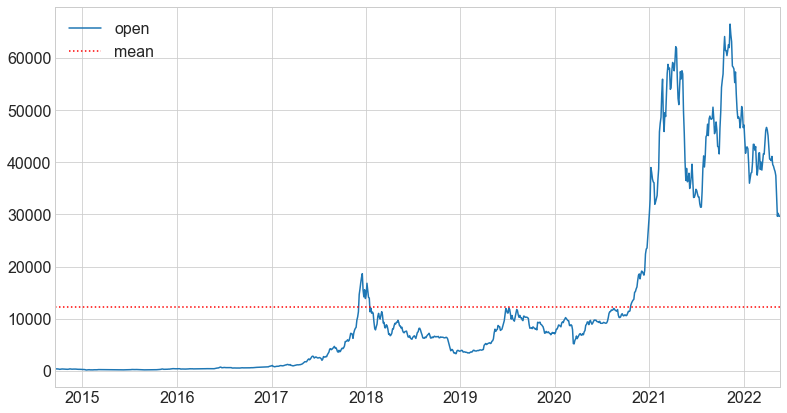

HIGH


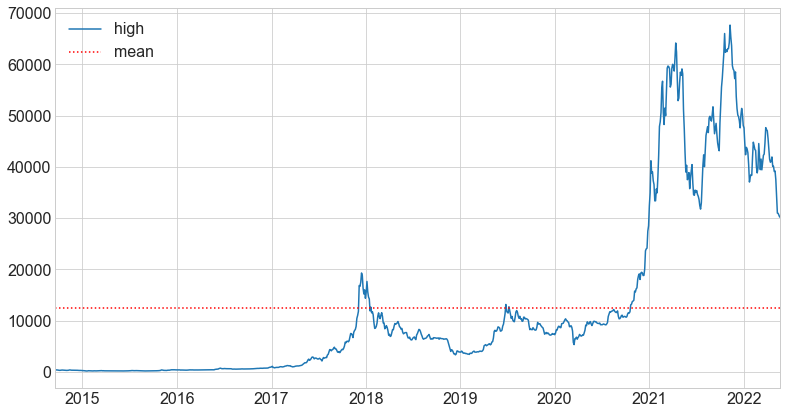

LOW


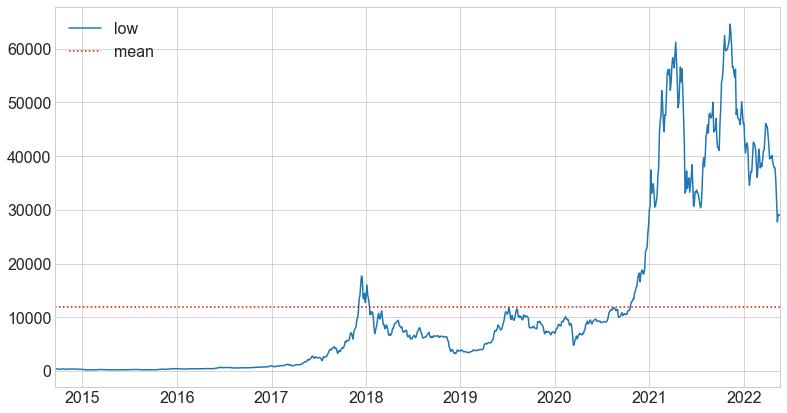

CLOSE


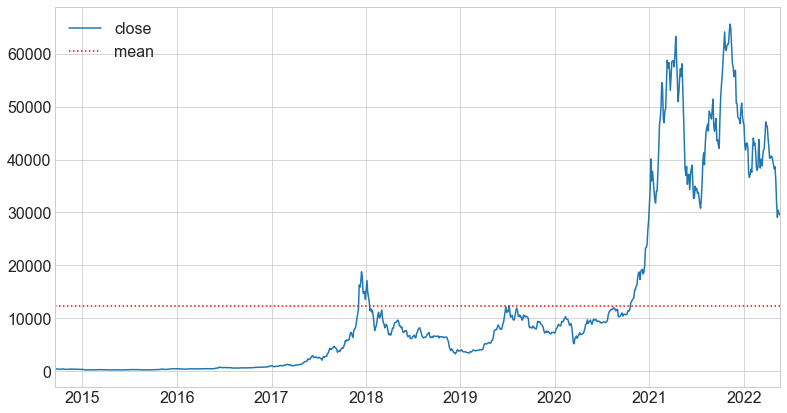

VOLUME


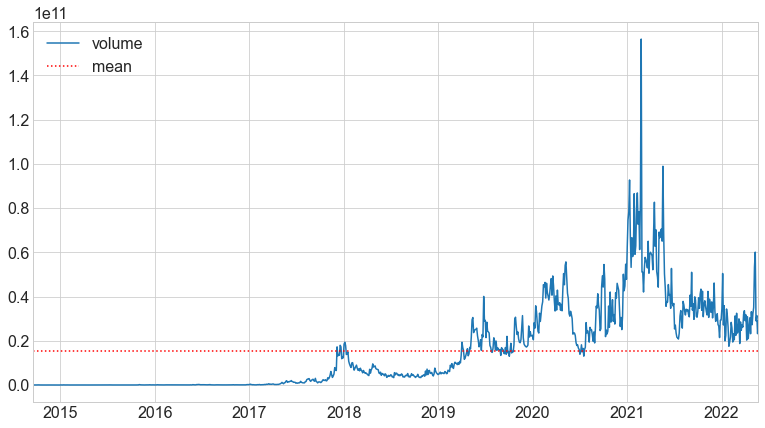

FWD_LOG_RET


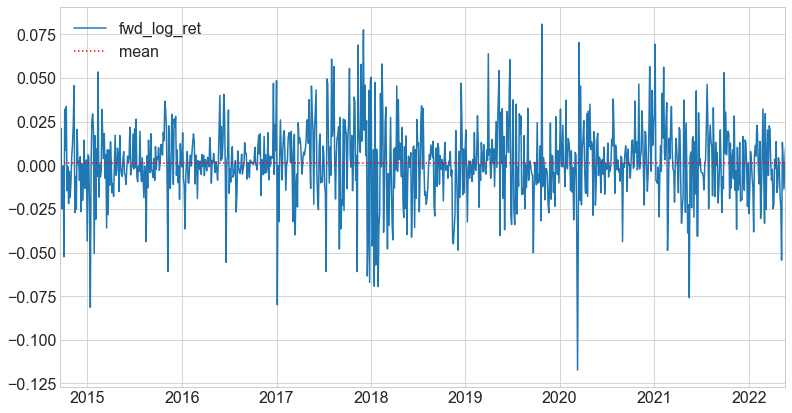

FWD_RET


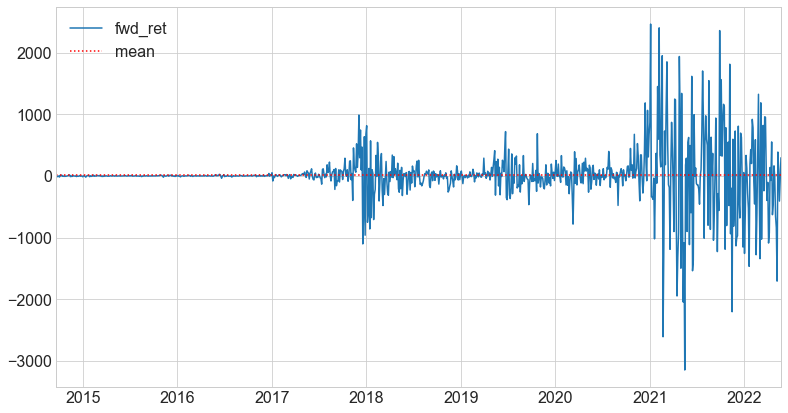

FWD_PCT_CHG


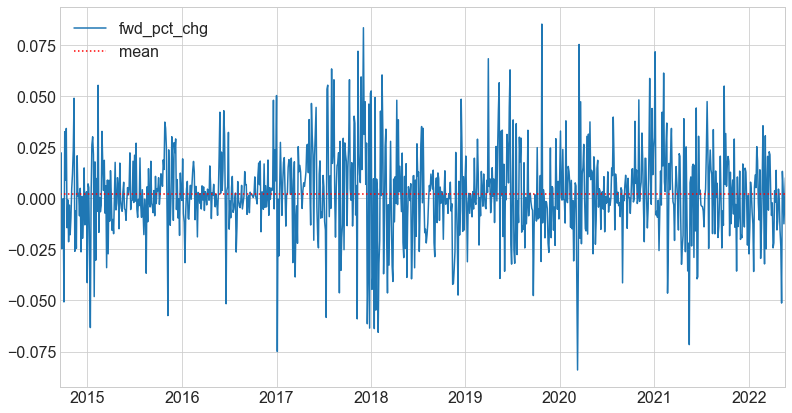

FWD_CLOSE_POSITIVE


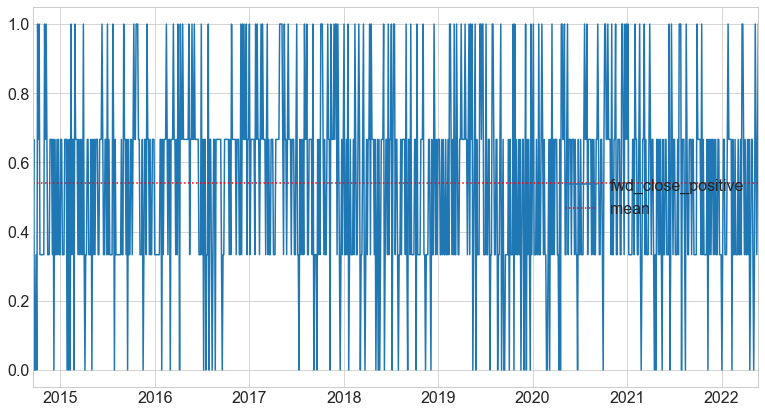

COST_PERTRANSACTION


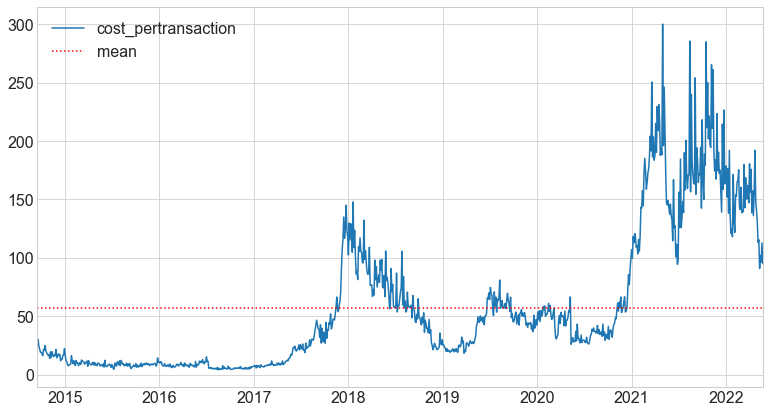

COST_PERTRANSACTION_PERCENT


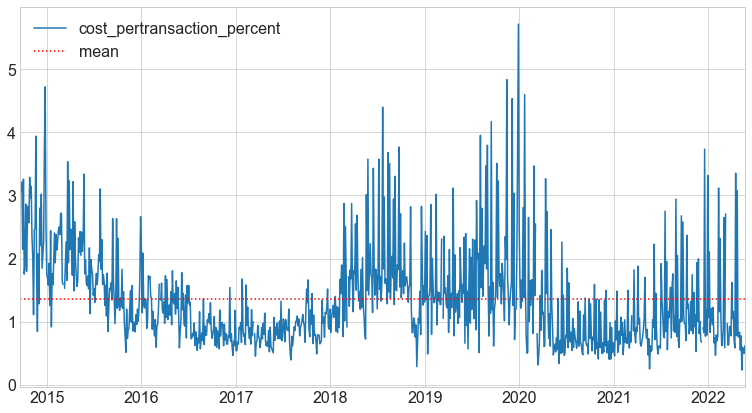

FEES_PERTRANSACTION


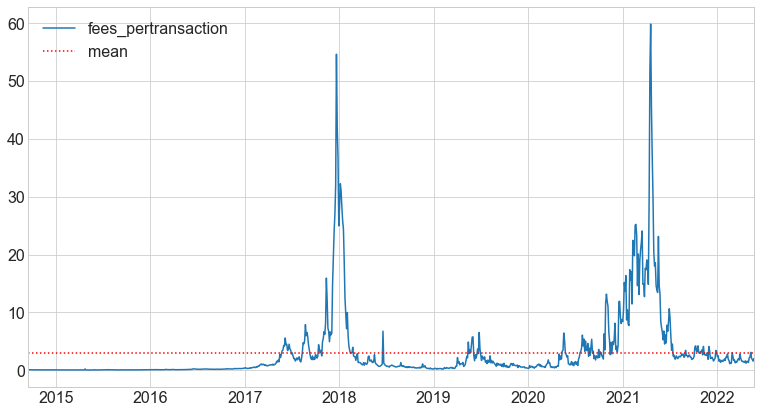

FEES_TOMINERS


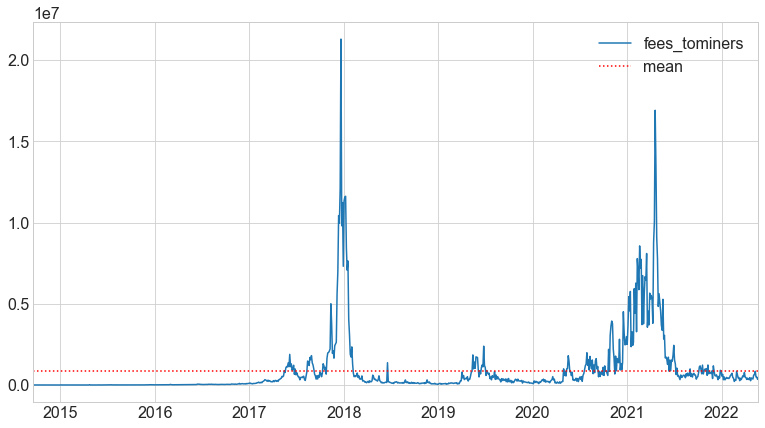

MINERS_REVENUE


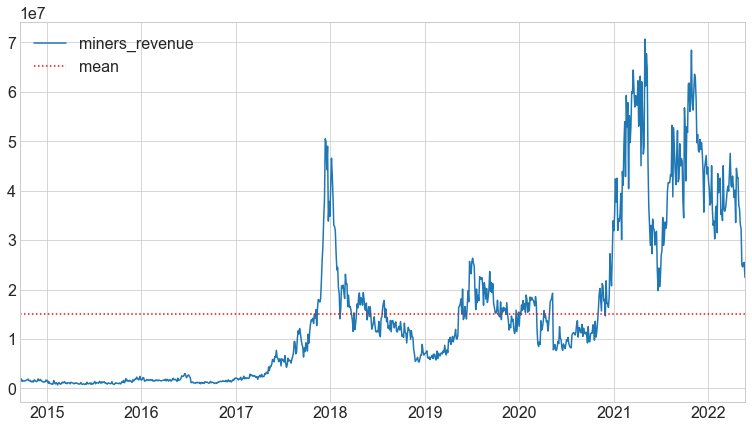

RELATIVE_DIFFICULTY


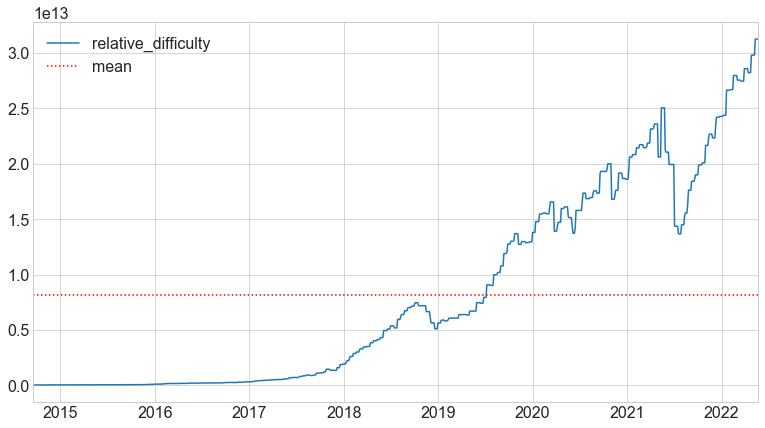

TOTAL_HASH_RATE


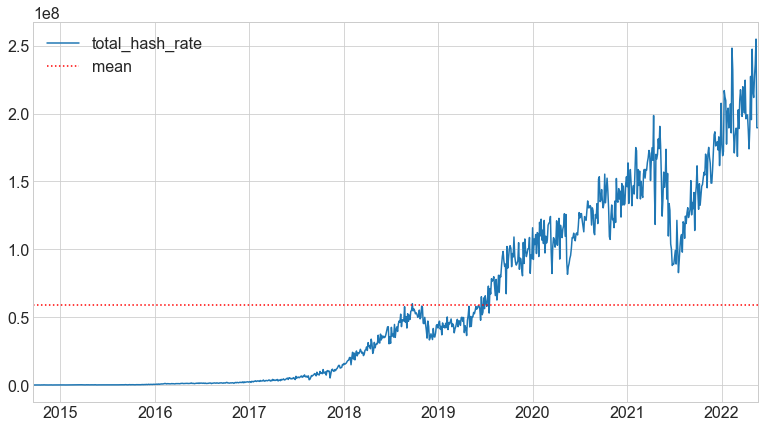

In [66]:
for col in df.columns:
    print(col.upper())
    df[col].resample('3D').mean().plot()
    plt.axhline(df[col].mean(), color='red', ls='dotted', label='mean')
    plt.legend()
    plt.show()